In [20]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import talib
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [21]:
# Đọc dữ liệu
df = pd.read_csv('FPT.csv')
df

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,FPT,12/25/2018 9:15,30.89,30.89,30.89,30.89,35410,0
1,FPT,12/25/2018 9:16,30.81,30.81,30.81,30.81,190,0
2,FPT,12/25/2018 9:17,30.74,30.81,30.74,30.74,1120,0
3,FPT,12/25/2018 9:18,30.74,30.74,30.74,30.74,2120,0
4,FPT,12/25/2018 9:19,30.74,30.74,30.74,30.74,22500,0
...,...,...,...,...,...,...,...,...
97401,FPT,12/22/2020 14:24,58.20,58.20,58.20,58.20,27470,0
97402,FPT,12/22/2020 14:25,58.20,58.20,58.20,58.20,14820,0
97403,FPT,12/22/2020 14:26,58.20,58.20,58.20,58.20,500,0
97404,FPT,12/22/2020 14:29,58.10,58.10,58.10,58.10,2500,0


In [22]:
# Tiền xử lý dữ liệu
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df = df.set_index('Date/Time')

In [23]:
# Tính toán các chỉ số kỹ thuật
df['MA5'] = df['Close'].rolling(5).mean() 
df['RSI'] = talib.RSI(df['Close'])

In [24]:
# Phân tách dữ liệu 
train = df['12/25/2018 9:15':'12/22/2020 14:29']
val = df['12/22/2020 14:30':]

In [25]:
# Huấn luyện ARIMA
model = ARIMA(train['Close'], order=(5,1,0))  
model = model.fit()

C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [26]:
# Dự đoán trên tập validation
val_predictions = model.forecast(len(val))
mse = mean_squared_error(val['Close'], val_predictions)
print('MSE:', mse)

MSE: 0.0003341432451089875


C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [29]:
# Dự đoán 1 phút tiếp theo
last_date = df.index[-1]
future_date = last_date + pd.DateOffset(minutes=1) 

future_prediction = model.forecast(1)
future_prediction

C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


97405    58.11828
dtype: float64

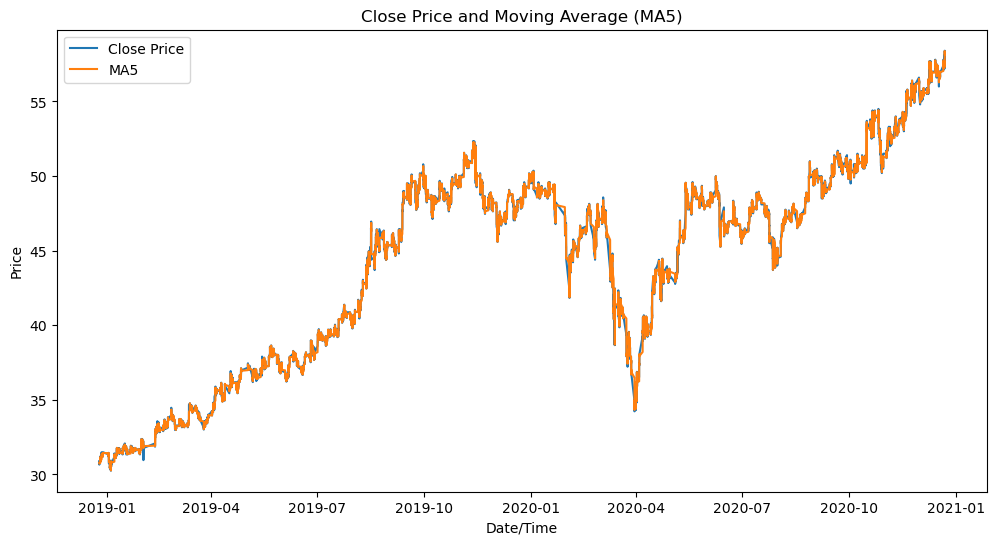

In [31]:
# Đồ thị MA và giá đóng cửa
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.plot(df.index, df['MA5'], label='MA5')
plt.title('Close Price and Moving Average (MA5)')
plt.xlabel('Date/Time')
plt.ylabel('Price')
plt.legend()
plt.show()

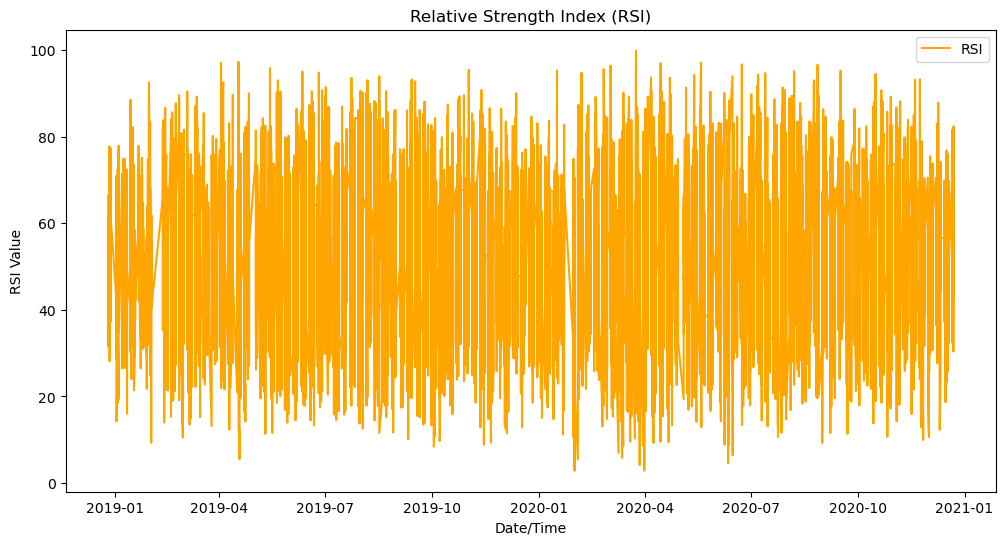

In [32]:
# Đồ thị RSI
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['RSI'], label='RSI', color='orange')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date/Time')
plt.ylabel('RSI Value')
plt.legend()
plt.show()

In [35]:
model.save('arima_model.hdf5')

RSI > 70 được coi là tín hiệu "quá mua" (overbought) trong phân tích kỹ thuật.

Cụ thể:

RSI > 70: Cho thấy giá cổ phiếu đã tăng nóng, nhanh và mạnh trong thời gian vừa qua. Lúc này khả năng cao giá sẽ hạ nhiệt và điều chỉnh giảm trở lại (correction) vì đã ở mức "đắt" so với giá trị thực. Đây gọi là tín hiệu "quá mua".
RSI < 30: Ngược lại RSI dưới 30 là tín hiệu "quá bán". Cho thấy giá đã giảm sâu về vùng quá rẻ so với giá trị thực. Có khả năng giá sẽ tăng trở lại nhờ lực cầu mua vào.
Nhìn chung, khi RSI vượt ngưỡng 70 hay xuống dưới 30 thường báo hiệu các cơ hội đảo chiều giao dịch mua/bán trong ngắn hạn.